In [6]:
import math
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo 


In [53]:
# Fetch dataset
mi_data = fetch_ucirepo(id=579)
df = mi_data.data.original.copy()
df


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
print(f"Keys of mi_data: {mi_data.keys()}")
print(f"Keys of mi_data.data: {mi_data.data.keys()}")
print(f"Keys of mi_data.metadata: {mi_data.metadata.keys()}")
print(f"Keys of mi_data.variables: {mi_data.variables.keys()}")

Keys of mi_data: dict_keys(['data', 'metadata', 'variables'])
Keys of mi_data.data: dict_keys(['ids', 'features', 'targets', 'original', 'headers'])
Keys of mi_data.metadata: dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])
Keys of mi_data.variables: Index(['name', 'role', 'type', 'demographic', 'description', 'units',
       'missing_values'],
      dtype='object')


In [55]:
# Define features
nominal_features = ["SEX", "IBS_NASL", "SIM_GIPERT", "ZSN", "LET_IS"]
ordinal_features = ["FK_STENOK", "IBS_POST", "GB"]
continuous_features = ["AGE", "S_AD_ORIT", "D_AD_ORIT"]

# Convert nominal features to categorical with labels
nominal_mappings = {
    'SEX': {0: 'Female', 1: 'Male'},
    'IBS_NASL': {0: 'No Heredity', 1: 'Heredity'},
    'SIM_GIPERT': {0: 'No Hypertension', 1: 'Hypertension'},
    'ZSN': {0: 'No CHF', 1: 'CHF'},
}

for feature in nominal_features:
    if feature in nominal_mappings:
        df[feature] = df[feature].map(nominal_mappings[feature])
    df[feature] = df[feature].astype('category')

ordinal_mappings = {
    "FK_STENOK": ["No Angina", "I FC", "II FC", "III FC", "IV FC"],
    "IBS_POST": ["No CHD", "Exertional Angina", "Unstable Angina"],
    "GB": ["No Hypertension", "Stage 1", "Stage 2", "Stage 3"]
}

for feature, categories in ordinal_mappings.items():
    df[feature] = pd.Categorical(df[feature], categories=range(len(categories)), ordered=True)
    df[feature] = df[feature].cat.rename_categories(categories)

continuous_features = ["AGE", "S_AD_ORIT", "D_AD_ORIT"]
for feature in continuous_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

df_clean = df.dropna(subset=continuous_features + nominal_features + ordinal_features)
df_clean

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1,2,55.0,Male,1.0,0.0,No Angina,No CHD,No Heredity,No Hypertension,No Hypertension,...,0,0,0,0,0,0,No CHF,0,0,0
13,14,57.0,Male,0.0,0.0,No Angina,Unstable Angina,No Heredity,Stage 2,No Hypertension,...,0,0,0,0,0,0,No CHF,0,0,0
36,37,44.0,Female,0.0,5.0,II FC,Exertional Angina,No Heredity,Stage 3,No Hypertension,...,0,0,0,1,0,0,CHF,0,0,0
141,142,63.0,Female,0.0,5.0,II FC,Unstable Angina,Heredity,Stage 2,No Hypertension,...,0,0,0,0,0,0,No CHF,0,0,0
145,146,55.0,Male,0.0,6.0,II FC,Unstable Angina,Heredity,No Hypertension,No Hypertension,...,0,0,0,0,0,0,No CHF,0,1,0
163,164,76.0,Female,1.0,0.0,No Angina,No CHD,No Heredity,Stage 2,No Hypertension,...,0,0,0,0,0,0,No CHF,0,0,0
189,190,65.0,Male,0.0,0.0,No Angina,Unstable Angina,Heredity,No Hypertension,No Hypertension,...,0,0,0,0,0,0,No CHF,0,0,0
190,191,58.0,Male,0.0,0.0,No Angina,Unstable Angina,Heredity,Stage 2,No Hypertension,...,0,0,0,0,0,0,No CHF,0,0,0
266,267,38.0,Male,0.0,0.0,No Angina,Unstable Angina,Heredity,Stage 2,No Hypertension,...,0,0,0,0,0,0,No CHF,0,0,0
297,298,65.0,Female,1.0,5.0,II FC,Exertional Angina,No Heredity,Stage 2,No Hypertension,...,0,0,0,0,0,0,No CHF,0,0,0


## Descriptive Stats

### Key Features Visualized:
1. Age Distribution (Histogram)
2. Systolic Blood Pressure (S_AD_ORIT) 
3. Diastolic Blood Pressure (D_AD_ORIT) 
4. Chronic Heart Failure (ZSN) 
5. Functional Class of Angina (FK_STENOK) 
6. Coronary Heart Disease History (IBS_POST) 
7. Hypertension Presence (SIM_GIPERT) 
8. Heredity of CHD (IBS_NASL) 
9. Gender Distribution (SEX) 

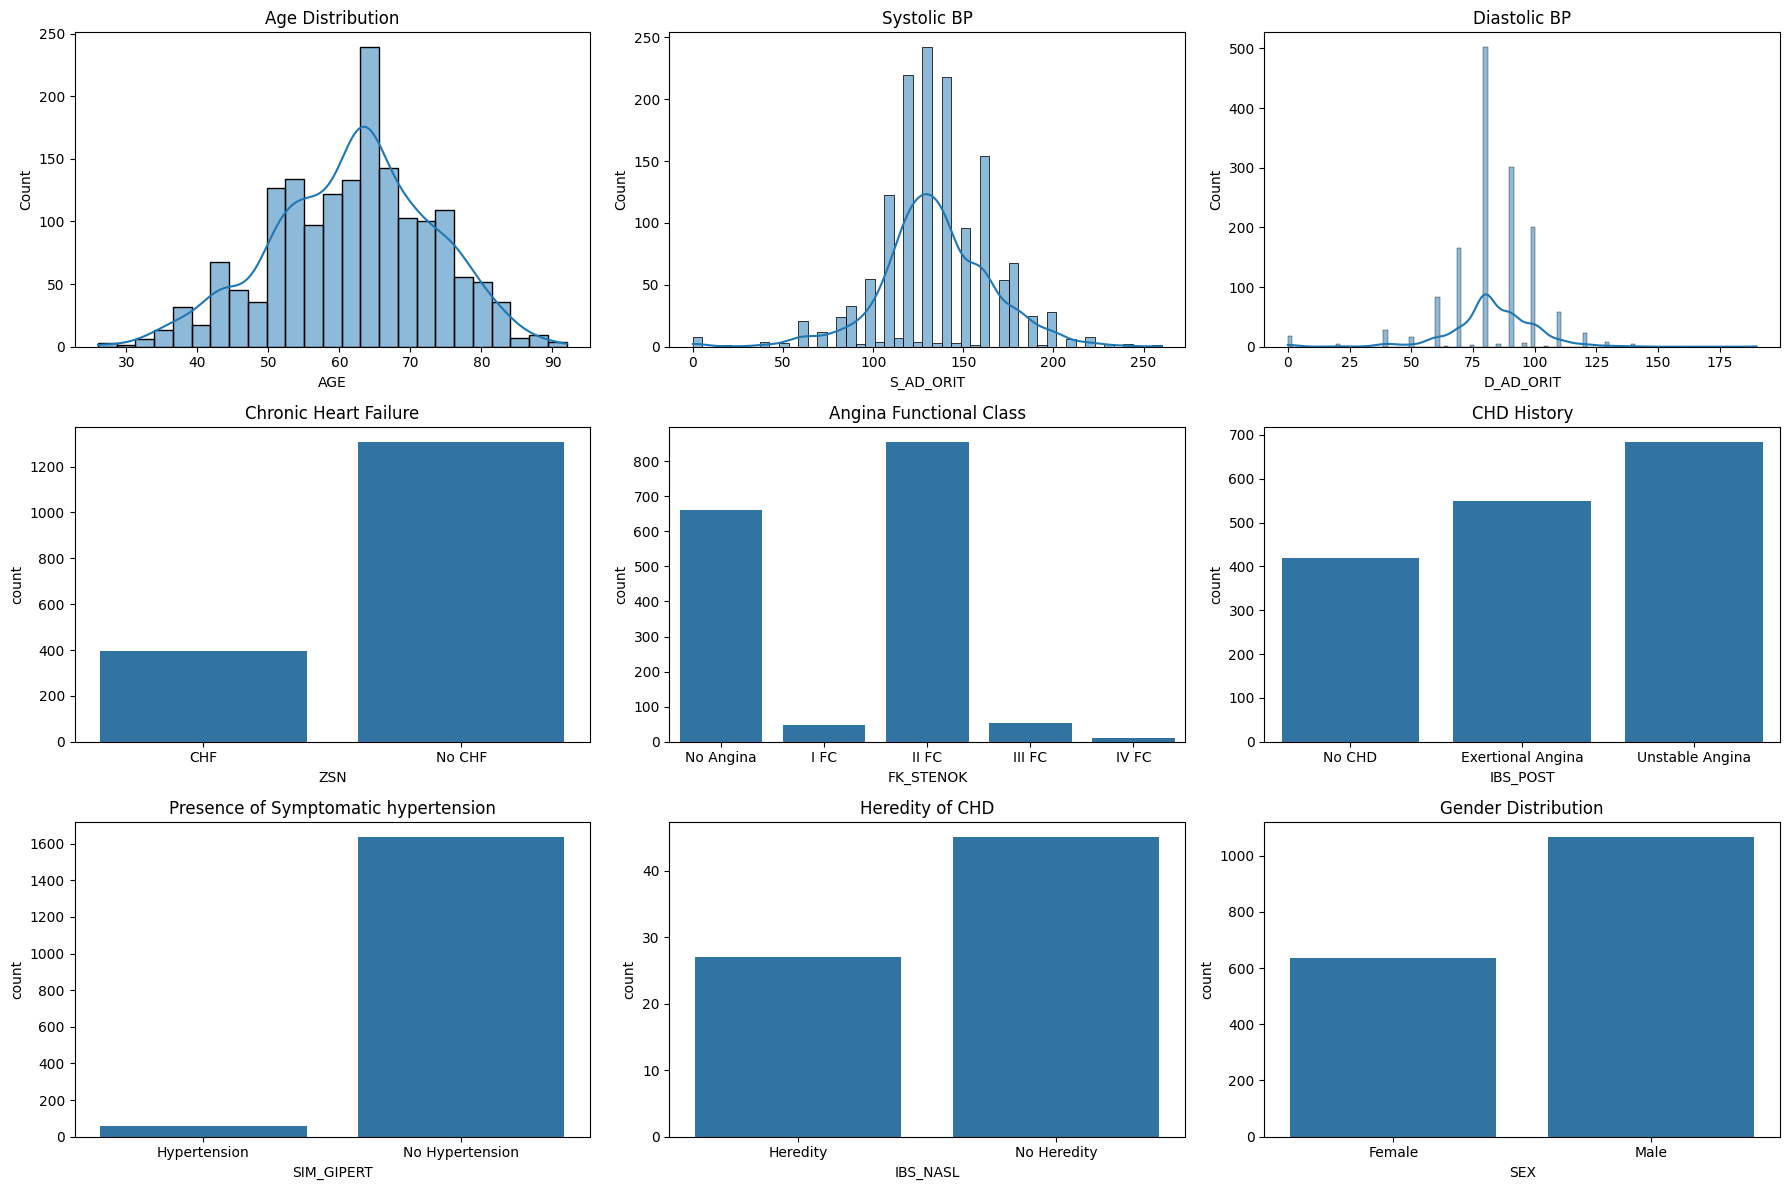

In [58]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
sns.histplot(df["AGE"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")
sns.histplot(df["S_AD_ORIT"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Systolic BP")
sns.histplot(df["D_AD_ORIT"], kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Diastolic BP")

sns.countplot(x="ZSN", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Chronic Heart Failure")
sns.countplot(x="FK_STENOK", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Angina Functional Class")
sns.countplot(x="IBS_POST", data=df, ax=axes[1, 2])
axes[1, 2].set_title("CHD History")
sns.countplot(x="SIM_GIPERT", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Presence of Symptomatic hypertension")
sns.countplot(x="IBS_NASL", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Heredity of CHD")
sns.countplot(x="SEX", data=df, ax=axes[2, 2])
axes[2, 2].set_title("Gender Distribution")
plt.tight_layout()
plt.show()

In [ ]:
# describe the data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,54.000000,54.000000,54,54.000000,53.000000,54,54,54,54,54,...,54.000000,54.0,54.0,54.000000,54.0,54.000000,54,54.000000,54.000000,54.0
unique,NaN,NaN,2,NaN,NaN,5,3,2,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3.0
top,NaN,NaN,Male,NaN,NaN,No Angina,Unstable Angina,No Heredity,No Hypertension,No Hypertension,...,NaN,NaN,NaN,NaN,NaN,NaN,No CHF,NaN,NaN,0.0
freq,NaN,NaN,37,NaN,NaN,28,21,32,28,53,...,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,NaN,52.0
mean,621.185185,55.370370,NaN,0.388889,1.849057,NaN,NaN,NaN,NaN,NaN,...,0.018519,0.0,0.0,0.092593,0.0,0.055556,NaN,0.055556,0.092593,NaN
std,400.912406,14.516479,NaN,0.656367,2.332020,NaN,NaN,NaN,NaN,NaN,...,0.136083,0.0,0.0,0.292582,0.0,0.231212,NaN,0.231212,0.292582,NaN
min,2.000000,26.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.000000,NaN
25%,320.750000,44.250000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.000000,NaN
50%,529.500000,57.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.000000,NaN
75%,929.250000,65.000000,NaN,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.000000,NaN


## Hypothesis Testing

In [62]:
# Normality test with p-value abd state the normality of the data
for feature in continuous_features:
    stat, p = stats.normaltest(df_clean[feature])
    print(f"Normality test for {feature}: p-value = {p}")
    if p < 0.05:
        print(f"{feature} is not normally distributed")
    else:
        print(f"{feature} is normally distributed")
    

Normality test for AGE: p-value = 0.23159809880284957
AGE is normally distributed
Normality test for S_AD_ORIT: p-value = 0.014667535629207378
S_AD_ORIT is not normally distributed
Normality test for D_AD_ORIT: p-value = 0.5956702031528566
D_AD_ORIT is normally distributed


#### The following hypothesis are tested

1. Is there a significant difference in age between male and female patients?
This was tested using a Mann-Whitney U test because age is non-normally distributed and we are comparing two independent groups.

2. Do systolic and diastolic blood pressure levels significantly differ between male and female patients?
This was tested using a Mann-Whitney U test because both systolic and diastolic blood pressure are non-normally distributed, making a non-parametric test more appropriate.

3. Does the prevalence of hypertension (SIM_GIPERT) differ significantly between male and female patients?
This was tested using a Chi-square test because both hypertension and gender are categorical variables, and we are testing for association.

4. Is there an association between functional class of angina (FK_STENOK) and coronary heart disease history (IBS_POST)?
This was tested using a Chi-square test because both angina severity and CHD history are categorical variables, and we are testing for association.

5. Does the presence of chronic heart failure (ZSN) significantly differ across different levels of systolic blood pressure?
This was tested using a Kruskal-Wallis test because systolic blood pressure is non-normally distributed, and we are comparing multiple groups.

6. Do patients with a hereditary burden of CHD (IBS_NASL) have significantly different blood pressure levels compared to those without a hereditary burden?
This was tested using a Mann-Whitney U test because systolic blood pressure is non-normally distributed, requiring a non-parametric test.

7. Is there a significant difference in age among patients with different classes of angina severity (FK_STENOK)?
This was tested using a Kruskal-Wallis test because age is non-normally distributed, making an ANOVA inappropriate.

8. Is there a significant difference in systolic blood pressure (S_AD_ORIT) among patients with different levels of CHD severity (IBS_POST)?
This was tested using a Kruskal-Wallis test because systolic blood pressure is non-normally distributed, and we are comparing multiple groups.

9. Do male and female patients have different distributions of coronary heart disease history (IBS_POST)?
This was tested using a Chi-square test because both gender and CHD history are categorical variables.

10. Does hypertension (SIM_GIPERT) have a significant association with functional class of angina (FK_STENOK)?
This was tested using a Chi-square test because both variables are categorical, and we are testing for association.

In [70]:
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, kruskal

# Hypothesis Testing

print("\n### Updated Hypothesis Testing Results ###")

# Normality-based decisions:
# AGE (normal), S_AD_ORIT (non-normal), D_AD_ORIT (normal)

# 1. Age difference by Gender (Independent t-test)
male_age = df_clean[df_clean['SEX'] == 'Male']['AGE']
female_age = df_clean[df_clean['SEX'] == 'Female']['AGE']
t_stat, p_val = ttest_ind(male_age, female_age)
print(f"Age by Gender (t-test): t={t_stat:.4f}, p-value={p_val:.4f}")

# 2. Blood pressure by Gender
# Systolic BP (Mann-Whitney U), Diastolic BP (t-test)

# Systolic BP
u_stat, p_val = mannwhitneyu(df_clean[df_clean['SEX'] == 'Male']['S_AD_ORIT'],
                             df_clean[df_clean['SEX'] == 'Female']['S_AD_ORIT'])
print(f"Systolic BP by Gender (Mann-Whitney U): U={u_stat}, p-value={p_val:.4f}")

# Diastolic BP
t_stat, p_val = ttest_ind(df_clean[df_clean['SEX'] == 'Male']['D_AD_ORIT'],
                          df_clean[df_clean['SEX'] == 'Female']['D_AD_ORIT'])
print(f"Diastolic BP by Gender (t-test): t={t_stat:.4f}, p-value={p_val:.4f}")

# 3. Hypertension prevalence by Gender (Chi-square Test)
cont_table = pd.crosstab(df_clean['SEX'], df_clean['SIM_GIPERT'])
chi2, p_val, _, _ = chi2_contingency(cont_table)
print(f"Hypertension by Gender (Chi-square): chi2={chi2:.4f}, p-value={p_val:.4f}")

# 4. Angina severity by CHD history (Chi-square Test)
cont_table = pd.crosstab(df_clean['FK_STENOK'], df_clean['IBS_POST'])
chi2, p_val, _, _ = chi2_contingency(cont_table)
print(f"Angina severity by CHD history (Chi-square): chi2={chi2:.4f}, p-value={p_val:.4f}")

# 5. CHF by systolic blood pressure levels (Kruskal-Wallis Test)
zsn_groups = [group['S_AD_ORIT'].values for name, group in df_clean.groupby('ZSN')]
h_stat, p_val = kruskal(*zsn_groups)
print(f"CHF by Systolic BP levels (Kruskal-Wallis): H={h_stat:.4f}, p-value={p_val:.4f}")

# 6. Blood pressure by CHD heredity
# Systolic BP (Mann-Whitney U), Diastolic BP (t-test)

# Systolic BP
u_stat, p_val = mannwhitneyu(df_clean[df_clean['IBS_NASL'] == 'Heredity']['S_AD_ORIT'],
                             df_clean[df_clean['IBS_NASL'] == 'No Heredity']['S_AD_ORIT'])
print(f"Systolic BP by CHD Heredity (Mann-Whitney U): U={u_stat}, p-value={p_val:.4f}")

# Diastolic BP
t_stat, p_val = ttest_ind(df_clean[df_clean['IBS_NASL'] == 'Heredity']['D_AD_ORIT'],
                          df_clean[df_clean['IBS_NASL'] == 'No Heredity']['D_AD_ORIT'])
print(f"Diastolic BP by CHD Heredity (t-test): t={t_stat:.4f}, p-value={p_val:.4f}")

# 7. Age by angina severity (ANOVA/Kruskal-Wallis Test)
age_groups = [group['AGE'].values for name, group in df_clean.groupby('FK_STENOK')]
h_stat, p_val = kruskal(*age_groups)
print(f"Age by Angina severity (Kruskal-Wallis): H={h_stat:.4f}, p-value={p_val:.4f}")

# 8. Systolic BP by CHD severity (Kruskal-Wallis Test)
sys_bp_groups = [group['S_AD_ORIT'].values for name, group in df_clean.groupby('IBS_POST')]
h_stat, p_val = kruskal(*sys_bp_groups)
print(f"Systolic BP by CHD severity (Kruskal-Wallis): H={h_stat:.4f}, p-value={p_val:.4f}")

# 9. CHD history distribution by Gender (Chi-square Test)
cont_table = pd.crosstab(df_clean['SEX'], df_clean['IBS_POST'])
chi2, p_val, _, _ = chi2_contingency(cont_table)
print(f"CHD history by Gender (Chi-square): chi2={chi2:.4f}, p-value={p_val:.4f}")

# 10. Hypertension by Angina severity (Chi-square Test)
cont_table = pd.crosstab(df_clean['SIM_GIPERT'], df_clean['FK_STENOK'])
chi2, p_val, _, _ = chi2_contingency(cont_table)
print(f"Hypertension by Angina severity (Chi-square): chi2={chi2:.4f}, p-value={p_val:.4f}")


### Updated Hypothesis Testing Results ###
Age by Gender (t-test): t=-3.1584, p-value=0.0026
Systolic BP by Gender (Mann-Whitney U): U=195.0, p-value=0.0257
Diastolic BP by Gender (t-test): t=-1.6578, p-value=0.1034
Hypertension by Gender (Chi-square): chi2=0.1620, p-value=0.6873
Angina severity by CHD history (Chi-square): chi2=38.6115, p-value=0.0000
CHF by Systolic BP levels (Kruskal-Wallis): H=4.6737, p-value=0.0306
Systolic BP by CHD Heredity (Mann-Whitney U): U=534.5, p-value=0.0013
Diastolic BP by CHD Heredity (t-test): t=2.5190, p-value=0.0149
Age by Angina severity (Kruskal-Wallis): H=1.8960, p-value=0.7549
Systolic BP by CHD severity (Kruskal-Wallis): H=5.0456, p-value=0.0802
CHD history by Gender (Chi-square): chi2=1.5001, p-value=0.4723
Hypertension by Angina severity (Chi-square): chi2=0.9461, p-value=0.9179


/tmp/ipykernel_259723/1699540791.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zsn_groups = [group['S_AD_ORIT'].values for name, group in df_clean.groupby('ZSN')]
/tmp/ipykernel_259723/1699540791.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = [group['AGE'].values for name, group in df_clean.groupby('FK_STENOK')]
/tmp/ipykernel_259723/1699540791.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
